# 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


import matplotlib.image as mpimg
from pathlib import Path
from PIL import Image

# 2. Define Path to Images and Labels

In [2]:
p = Path('../data/dataset')
file_list = [x for x in p.glob('**/*') if x.is_file()]
print(len(file_list))

2474


In [3]:
path_img = p/'train_x'
path_lbl = p/'train_y'

## Extract All Files 

In [4]:
x_file = [x for x in path_img.glob('**/*') if x.is_file()]
y_file = [y for y in path_lbl.glob('**/*') if y.is_file()]
len(x_file)

484

# 3. Visually Compare Image to Label and Determine Label Quality

In [41]:
filenum = 380
x_name = str(x_file[filenum]).split('\\')[-1]
y_name = str(y_file[filenum]).split('\\')[-1]

x = mpimg.imread(x_file[filenum])
y = mpimg.imread(y_file[filenum])

(-0.5, 1023.5, 767.5, -0.5)

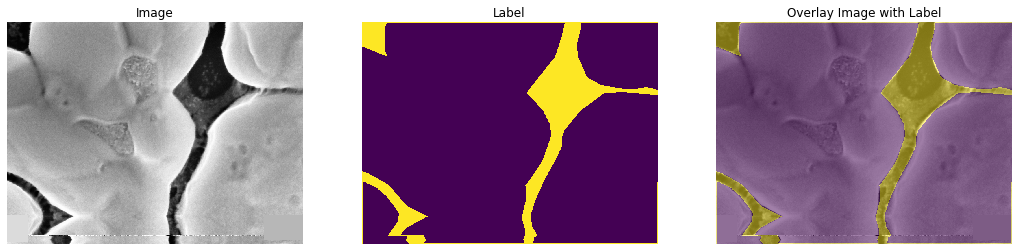

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(18, 16))

ax[0].imshow(x)
ax[0].set_title('Image')
ax[0].axis('off')

ax[1].imshow(y)
ax[1].set_title('Label')
ax[1].axis('off')

ax[2].imshow(x)
ax[2].imshow(y, alpha=0.5)
ax[2].set_title('Overlay Image with Label')
ax[2].axis('off')

## Assign Which Folder to Put Image Label Pair Depending on Assessment

In [43]:
new_folder = 'good'

# The good folder is for image/label pairs that don't need any more fixing
if new_folder == 'good':
    cv2.imwrite(f'../data/dataset/good/train_x/{x_name}', x)
    cv2.imwrite(f'../data/dataset/good/train_y/{y_name}', y)

# The maybe folder is for image/label pairs that only need a bit of touching up to be acceptable
elif new_folder == 'maybe':
    cv2.imwrite(f'../data/dataset/maybe/train_x/{x_name}', x)
    cv2.imwrite(f'../data/dataset/maybe/train_y/{y_name}', y)

# The bad folder is for image/label pairs that are unsalvageable
elif new_folder == 'bad':
    cv2.imwrite(f'../data/dataset/bad/train_x/{x_name}', x)
    cv2.imwrite(f'../data/dataset/bad/train_y/{y_name}', y)

## Keep track of which file was last assessed

In [44]:
print(filenum)

380
